In [22]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import lightgbm as lgbm


%matplotlib inline

In [21]:
#pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
PATH = 'D:/GitHub/Study/MADE_2022_1_Bin_Classification/MADE_2022_1_Bin_Classification/data/'

In [4]:
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')
sam_sub = pd.read_csv(PATH + 'sample_submission.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6963 non-null   float64
 1   1       6963 non-null   float64
 2   2       6963 non-null   float64
 3   3       6963 non-null   float64
 4   4       6963 non-null   float64
 5   5       6963 non-null   float64
 6   6       6963 non-null   float64
 7   7       6963 non-null   float64
 8   8       6963 non-null   float64
 9   9       6963 non-null   float64
 10  10      6963 non-null   float64
 11  11      6963 non-null   float64
 12  12      6963 non-null   float64
 13  13      6963 non-null   float64
 14  14      6963 non-null   float64
 15  15      6963 non-null   float64
 16  16      6963 non-null   float64
 17  17      6963 non-null   float64
 18  18      6963 non-null   float64
 19  19      6963 non-null   float64
 20  20      6963 non-null   float64
 21  21      6963 non-null   float64
 22  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3920 non-null   float64
 1   1       3920 non-null   float64
 2   2       3920 non-null   float64
 3   3       3920 non-null   float64
 4   4       3920 non-null   float64
 5   5       3920 non-null   float64
 6   6       3920 non-null   float64
 7   7       3920 non-null   float64
 8   8       3920 non-null   float64
 9   9       3920 non-null   float64
 10  10      3920 non-null   float64
 11  11      3920 non-null   float64
 12  12      3920 non-null   float64
 13  13      3920 non-null   float64
 14  14      3920 non-null   float64
 15  15      3920 non-null   float64
 16  16      3920 non-null   float64
 17  17      3920 non-null   float64
 18  18      3920 non-null   float64
 19  19      3920 non-null   float64
 20  20      3920 non-null   float64
 21  21      3920 non-null   float64
 22  

In [7]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
train['sample'] = 1 # помечаем где у нас трейн
test['sample'] = 0 # помечаем где у нас тест

df = test.append(train, sort=False).reset_index(drop=True) # объединяем

C:\Users\Rusla\AppData\Local\Temp\ipykernel_10320\1945411949.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = test.append(train, sort=False).reset_index(drop=True) # объединяем


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10883 non-null  float64
 1   1       10883 non-null  float64
 2   2       10883 non-null  float64
 3   3       10883 non-null  float64
 4   4       10883 non-null  float64
 5   5       10883 non-null  float64
 6   6       10883 non-null  float64
 7   7       10883 non-null  float64
 8   8       10883 non-null  float64
 9   9       10883 non-null  float64
 10  10      10883 non-null  float64
 11  11      10883 non-null  float64
 12  12      10883 non-null  float64
 13  13      10883 non-null  float64
 14  14      10883 non-null  float64
 15  15      10883 non-null  float64
 16  16      10883 non-null  float64
 17  17      10883 non-null  float64
 18  18      10883 non-null  float64
 19  19      10883 non-null  float64
 20  20      10883 non-null  float64
 21  21      10883 non-null  float64
 22

In [11]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,sample,target
3906,-1.180035,4.353546,2.881422,0.225523,-1.289647,1.608656,-3.528716,-1.026714,2.075276,9.70654,...,4.660327,-3.743819,1.000032,-0.171116,-2.406853,-1.214938,1.689891,-6.148552,0,NaN


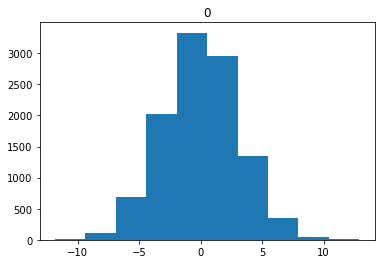

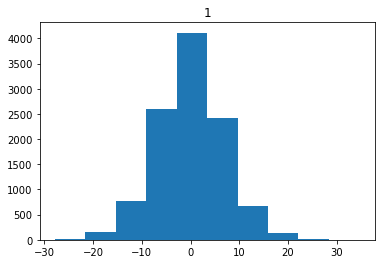

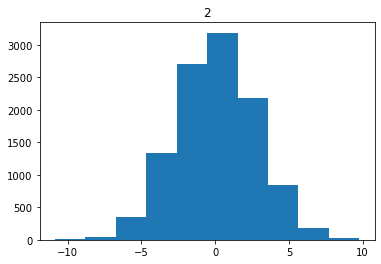

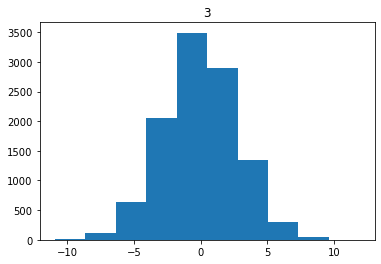

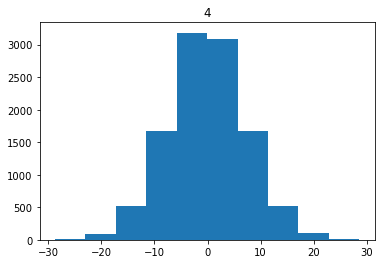

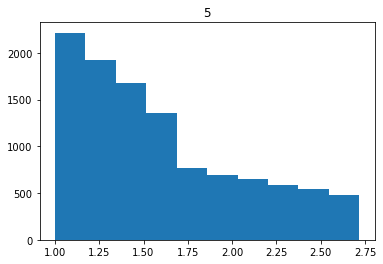

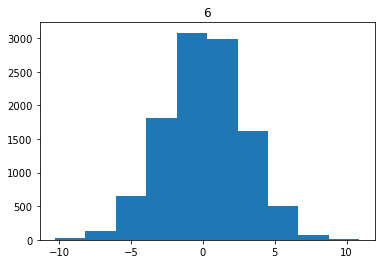

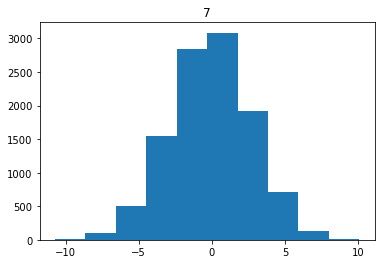

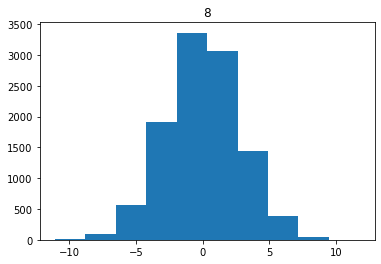

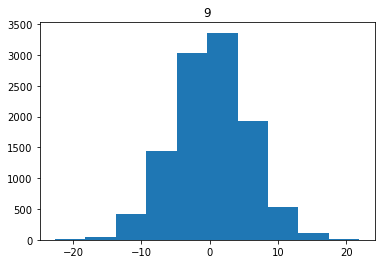

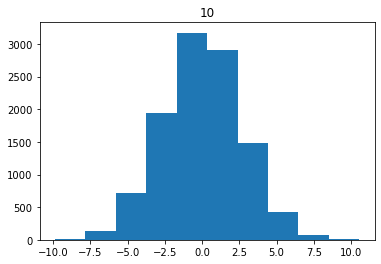

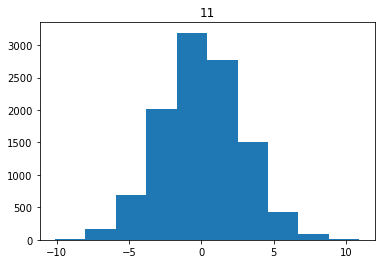

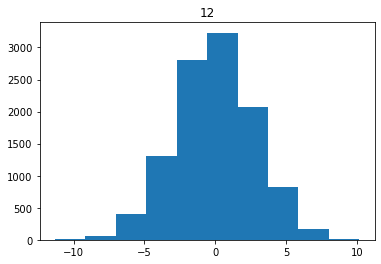

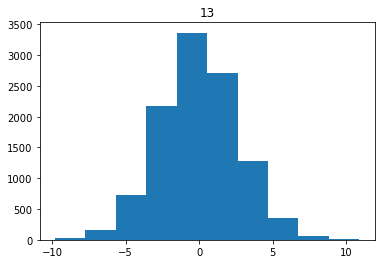

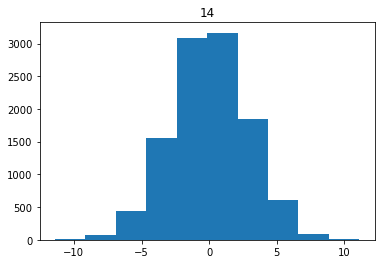

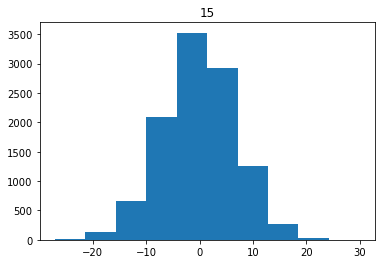

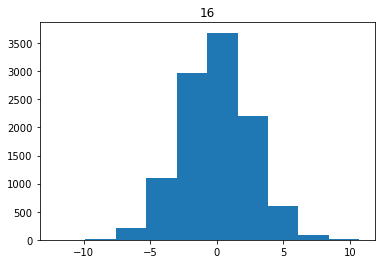

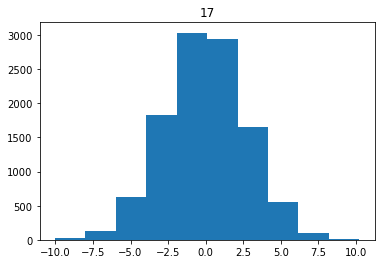

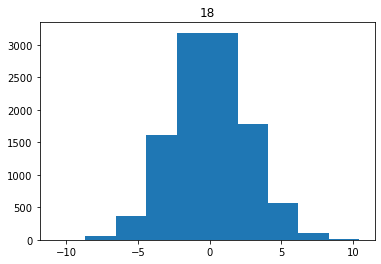

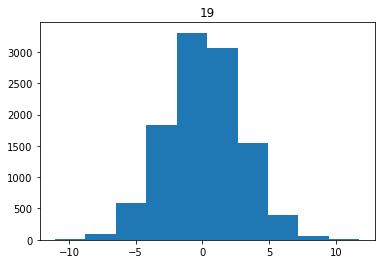

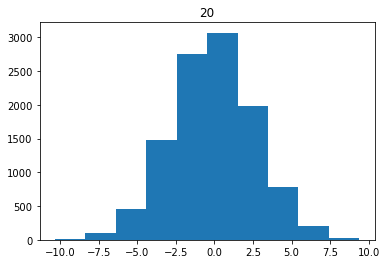

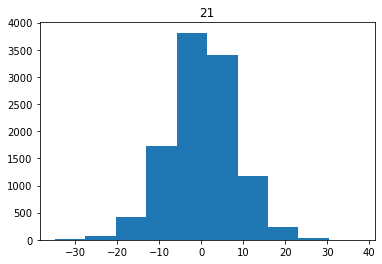

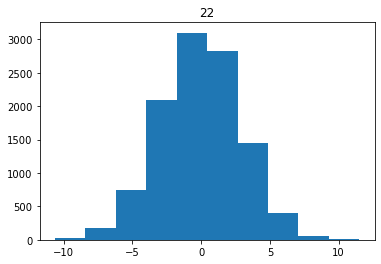

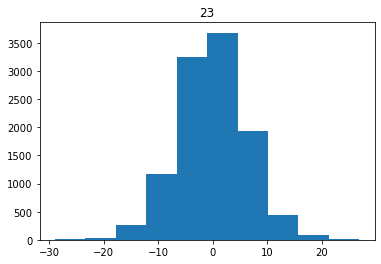

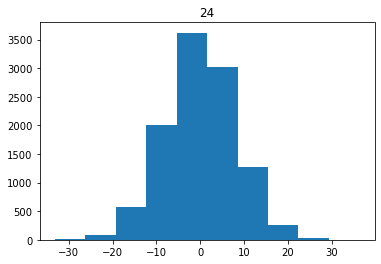

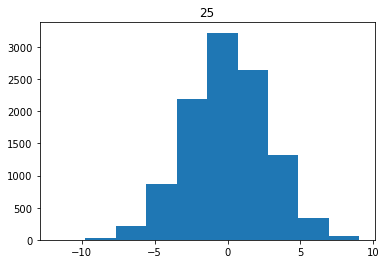

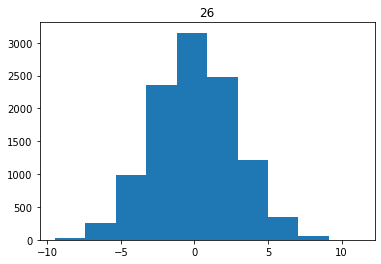

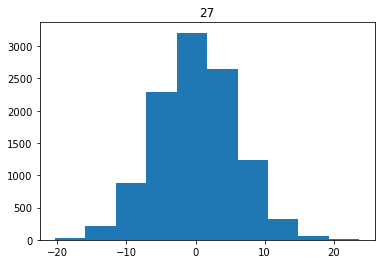

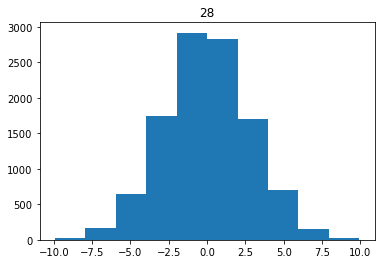

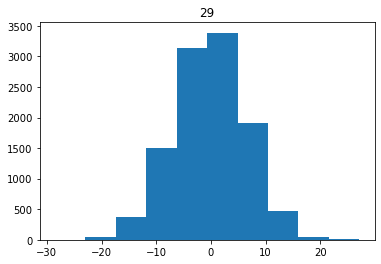

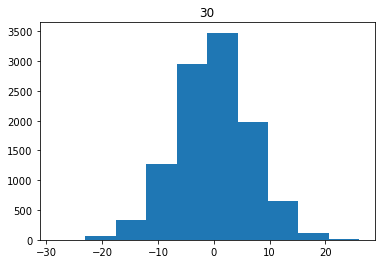

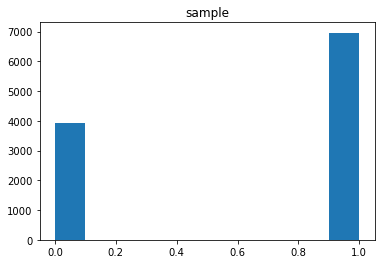

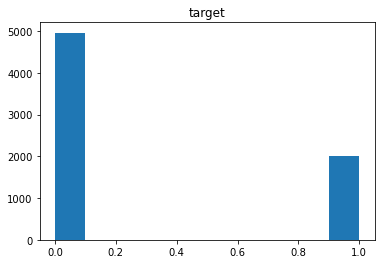

In [18]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [24]:
train = df[df['sample'] == 1].copy()
train.drop(['sample'], axis = 1, inplace = True)

In [26]:
test = df[df['sample'] == 0].copy()
test.drop(['sample','target'], axis = 1, inplace = True)

In [28]:
X = train.drop(['target'], axis = 1).copy()
Y = train['target']

In [30]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.4)

In [31]:
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val,
                                                    stratify=y_test_val, 
                                                    test_size=0.5)

In [32]:
model = lgbm.LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

1.0

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_pred)

1.0

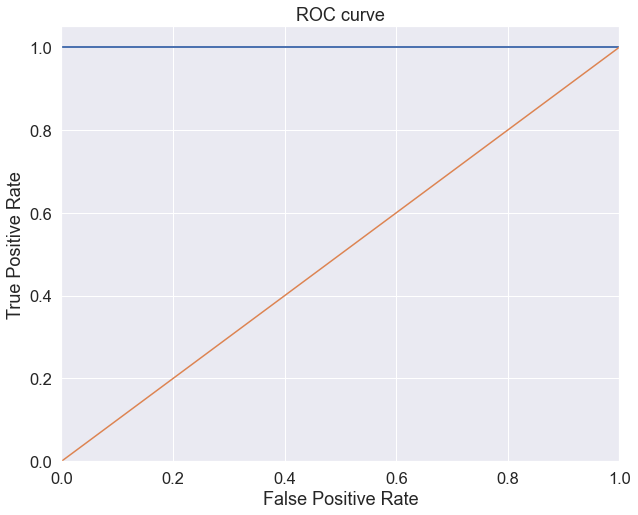

In [36]:
from sklearn import metrics

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [37]:
y_pred_val = model.predict(X_val)
f1_score(y_val, y_val)

1.0

In [40]:
tar = model.predict(test)

In [41]:
test['target'] = tar

In [42]:
test.sample()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
2633,-4.008501,0.712194,-4.047388,0.867151,7.462311,1.902432,-1.311031,-2.226197,-4.280117,-6.544934,...,-2.791255,3.946813,5.335904,1.610298,1.253112,-0.440226,5.650536,2.123609,2.332251,1.0


In [43]:
submission = test[['target']]

In [44]:
display(submission.sample(10))
display(submission.shape)

,target
648,0.0
933,1.0
3073,1.0
1942,0.0
1955,1.0
3249,0.0
309,0.0
3224,1.0
3309,0.0
1839,1.0


(3920, 1)

In [45]:
submission.to_csv('submission.csv', index=False)